## Welcome to EDA on Penguins Dataset

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import calendar

In [33]:
sns.set_style('whitegrid')

In [34]:
df = pd.read_csv("/Users/danavanwyk/Desktop/Hyperion Dev Data Science/2- Data Analytics and Exploration/Task 18/archive/penguins_size.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [36]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [37]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:>

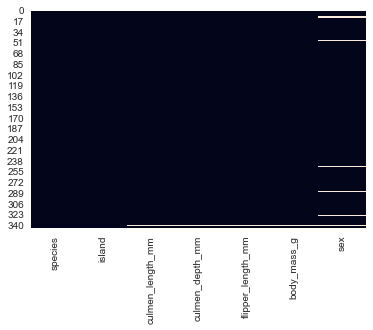

In [38]:
sns.heatmap(df.isnull(), cbar=False)

Check for null values in our Data Set.

In [39]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# **Data Cleaning**

We have a few missing valus in the "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g" and "sex" Columns we can replace all the null values with 0 to be able to use them as a full Data set. 

In [40]:
df.iloc[:,9:13] = df.iloc[:,9:13].fillna(value = df.iloc[:,9:13].mean())

In [57]:
df['sex'] = df['sex'].fillna('MALE')


In [55]:
df['sex'].replace({".": 'FEMALE'}, inplace=True)
df['sex'].value_counts()

MALE      178
FEMALE    166
Name: sex, dtype: int64

We can see now that we have good almost equal distribution amogst our Data set for Male and Female. This is good as it allows a good aven analysis.

<AxesSubplot:>

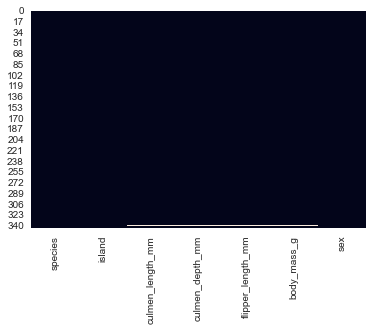

In [43]:
sns.heatmap(df.isnull(), cbar=False)

# Locations of penguins

Let's start of by checking where our little guys choose to build their habitat.

<AxesSubplot:xlabel='island', ylabel='count'>

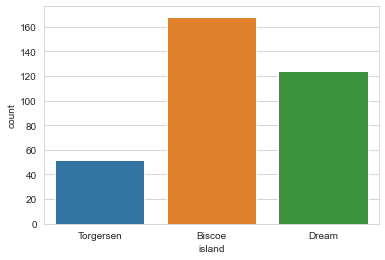

In [44]:
sns.countplot(x='island',data=df)

We can see Torgersen has less amount of penguins lets see why that is. By putthing each island into its own graph and splitting them into their genders.

In [45]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

# Population of penguins by gender on each island

From the three Graphs below we can see that not only does the island "Torgensen" have only "Adelie" penguins staying there the amount of Adelie penguins compared to our other two species especially Gentoo penguins are a lot more. This could mean that Adelie penguins prefer to live in smaller colonies or the amount of resources on the island Torgensen is only enough to sustain this amount of Adelie Penguins. We also see That Adleie penguins do share their island on the other two islands "Biscoe" and "Dream". On the Island Biscoe they are are heavily outnumbered and this could contribute to the numbers that can happily live there as they are competing with another species for resources. On the Island Dream we can see that there are Adelie and Chinstrap Penguins on the island similar in colonie size and also the number of Males to Females are quite similar in both Colonies. This is Great as it shows that the two species can coincide on the same island.  

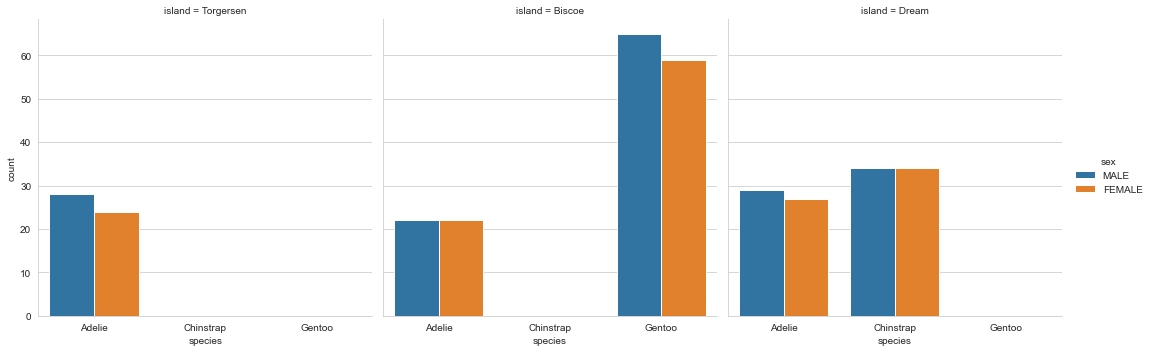

In [46]:
sns.catplot(x="species", hue="sex", col="island",data=df, kind="count") 

# Analysis on structure of penguins

Firstly it is interesting to see that Gentoo's are all only in one location and they are a large colony outnumbering their co inhabitants of the Adelie species by about 70%. let's take a closer look at each species size. as this could be a big factor in why a certain species could dominate in numbers. 

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

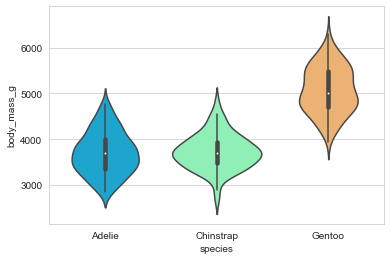

In [47]:
sns.violinplot(x="species", y="body_mass_g", data=df,palette='rainbow')

Gentoo Penguins are quite a bit heavier than the Adelie Penguins. This can contribute to the fact that they are much more prominent on this specific Island. Let's take a look at some interesting facts about the Penguin Species like their Physical Characteristics.

Text(0, 0.5, 'body mass')

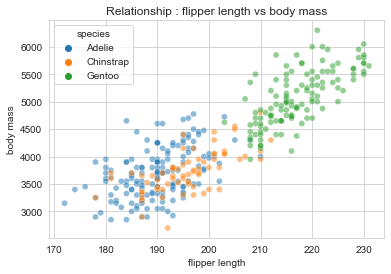

In [48]:
sns.scatterplot(data = df , x = 'flipper_length_mm' , y = 'body_mass_g' , hue = 'species' , alpha = 0.5 )
plt.title("Relationship : flipper length vs body mass")
plt.xlabel("flipper length")
plt.ylabel("body mass")

As the graph displays, it seems that flipper length and body mass has direct correlation.
In this graph, we used different colors to display different species.
As we already knew it seems that gentoo is the largest species.

We can now take a look at the Culmen Lenght of each species as well.

In case you where curious or didn't know. YouWhat is the Culmen of a penguin?
The upper margin of the beak or bill is referred to as the Culmen and the measurement is taken using calipers 
with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers
depending on the standard chosen.

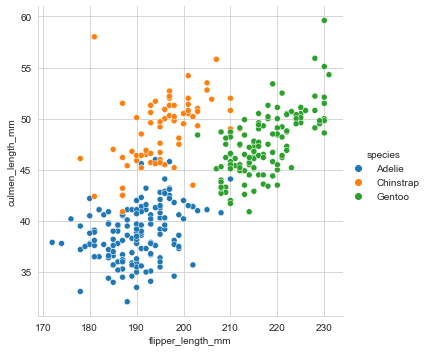

In [49]:
sns.relplot(data=df,x="flipper_length_mm",y="culmen_length_mm", hue="species")

<AxesSubplot:xlabel='body_mass_g', ylabel='sex'>

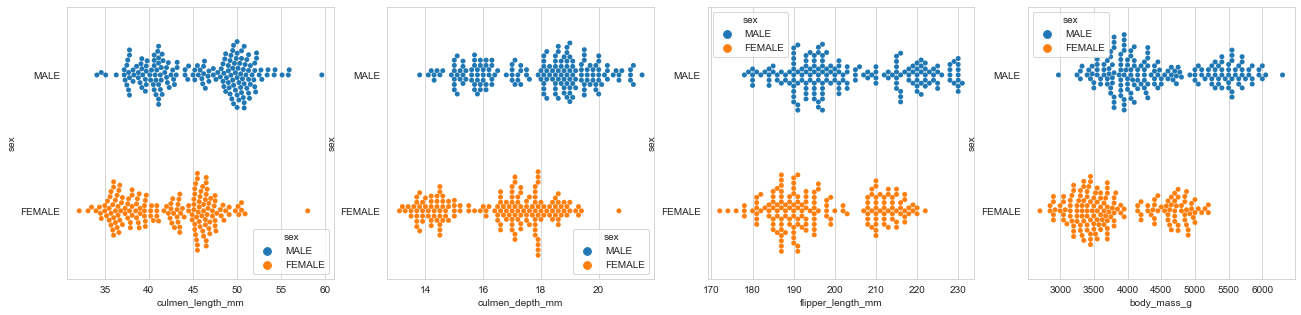

In [62]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4,figsize=(22,5))

sns.swarmplot(x="culmen_length_mm", y="sex", hue='sex',data=df,  ax=ax1)

sns.swarmplot(x="culmen_depth_mm", y="sex", hue='sex',data=df,  ax=ax2)

sns.swarmplot(x="flipper_length_mm", y="sex", hue='sex', data=df,  ax=ax3)

sns.swarmplot(x="body_mass_g", y="sex", hue='sex', data=df,  ax=ax4)


Adelie looks small in size comparing with other species.

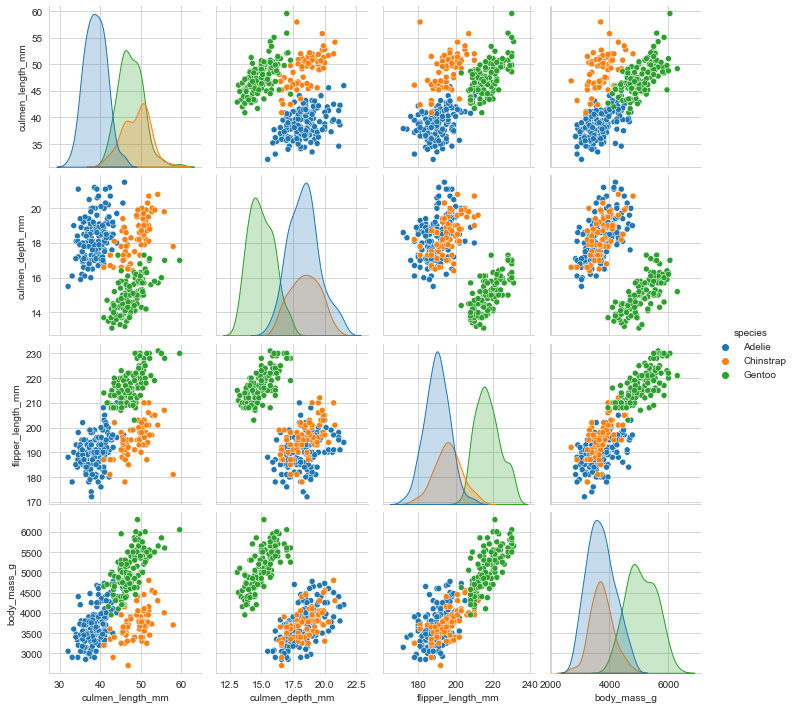

In [50]:
sns.pairplot(df,hue='species')

From above plot we can see that,

1.In case of culmen length, Adelie is easily seperable/distinguishable.

2.In case of culmen depth, flipper length and body mass, Gentoo is easily seperable/distinguishable

<AxesSubplot:>

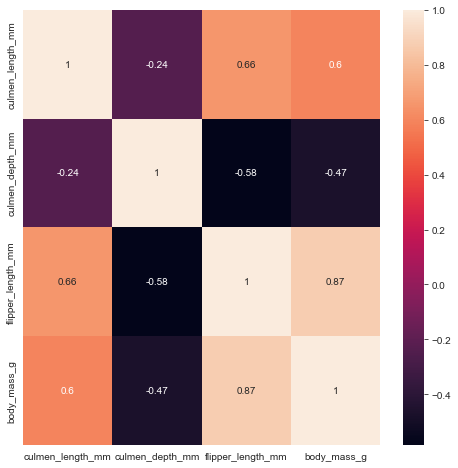

In [51]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

Flipper length and body_mass are strongly dependent with corelation value of 0.87. This could be as a bigger penguin needs bigger flippers to get them through the water as we know flippers are extremely good swimmers. Those big flippers have to get the job done to ensure their survival.

# **Conclusions**

# *Adelie lives in all three islands whereas Gentoo lives ont the island Biscoe and Chinstrap prefers the island Torgersen.*

# *Most of Gentoo has unique flipper length, body mass, culmen depth*

# *Most of adelie culmen length is less than 40mm*